# Case Analytics - Ricardo Rolo de Almeida

---

## 1. Conhecendo a base de dados

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans
from scipy.cluster.vq import vq

In [ ]:
df = pd.read_csv('./df_criado_final.csv')
df.head()

### 1.1 Tipos de Dados

In [ ]:
df.shape

In [ ]:
df.info()

> Como pudemos ver, nosso dataset possui: 50390 **linhas** e 23 **colunas** de dados, sendo eles, majoritariamente, valores **numéricos**, contendo também valores **booleanos** (Conta Poupanca, Conta Salario, Cheque Sem Fundo, etc) e **numéricos categóricos** (Escolaridade, Estado Civil, Gênero e Estado).  

> **Comentário:** o campo 'ID' (Identificação do tomador de crédito) é do tipo float, porém, normalmente, campos de identificação são armazenados como números inteiros. Vamos corrigir isso abaixo.
Vamos mudar também o tipo da variável 'Escolaridade' para o tipo int64

In [ ]:
df['ID'] = df['ID'].astype('int64')

In [6]:
df.head()

,Escolaridade,Renda Mensal Informal,Dependentes,Estado Civil,Idade,Conta Poupanca,Conta Salario,Quant Adiantamento Deposito,Qtd Fonte Renda,Cheque Sem Fundo,...,Valor Emprestimo,Multa,Juros,Valor Emprestimo Atualizado,PAGO,Controle,ID,Genero,Data,Estado
0,NaN,NaN,S,2,36,S,N,NaN,NaN,N,...,8174.32,263.25,5844.98,14282.55,1,1,1328587,1,2020-01-01,57
1,1.0,1894.5078,N,2,39,S,N,2.0,1.0,S,...,41775.63,1607.29,7652.26,51035.18,1,1,1424254,1,2020-01-01,59
2,1.0,NaN,S,2,26,S,N,NaN,1.0,S,...,522940.27,24860.40,319315.62,867116.29,1,1,1438519,0,2020-01-01,56
3,NaN,NaN,N,8,23,N,N,NaN,NaN,N,...,1593.00,21472.36,2967.48,26032.84,1,1,1426138,1,2020-01-01,56
4,NaN,NaN,S,2,33,S,N,NaN,NaN,N,...,2078.97,19.44,46.35,2144.76,1,1,1474504,0,2020-01-01,59


### 1.2 Características dos Dados  

Para análise de aprovação de crédito, usa-se, comumente, os seguintes dados (candidatas a possíveis variáveis preditoras):  

- CPF
- Nível de Escolaridade
- Profissão
- Renda
- Idade
- Bens de garantia
- Histórico de pagamento  

Abaixo, vamos analisar quais desses dados nós possuímos no nosso dataset

In [7]:
df.columns

Index(['Escolaridade', 'Renda Mensal Informal', 'Dependentes', 'Estado Civil',
       'Idade', 'Conta Poupanca', 'Conta Salario',
       'Quant Adiantamento Deposito', 'Qtd Fonte Renda', 'Cheque Sem Fundo',
       'Conta Conjunta', 'Valor Conta Corrente', 'Valor Conta Poupanca',
       'Valor Emprestimo', 'Multa', 'Juros', 'Valor Emprestimo Atualizado',
       'PAGO', 'Controle', 'ID', 'Genero', 'Data', 'Estado'],
      dtype='object')

> Vimos que, dos dados comumente usados, temos, a princípio:  

|           Dado           |                                                       Coluna(s)                                                       |
|:------------------------:|:---------------------------------------------------------------------------------------------------------------------:|
|   Nível de Escolaridade  |                                                      Escolaridade                                                     |
|   Histórico de Pagamento |                PAGO, Cheque Sem Fundo, Valor Emprestimo, Multa, Juros, Valor Emprestimo Atualizado                    |
|            Renda         | Renda Mensal Informal, Conta Poupanca, Conta Salario, Conta Conjunta, Valor Conta Corrente, Valor Conta Poupanca      | 
|           Idade          |                                                         Idade                                                         | 

##### Agora, vamos verificar quais desses dados estão bem definidos no nosso dataset para que possamos definir quais podem e quais não podem ser usados

## 2. Tratamento da base de dados (Valores Faltantes, Duplicatas)

### 2.1 Valores Faltantes

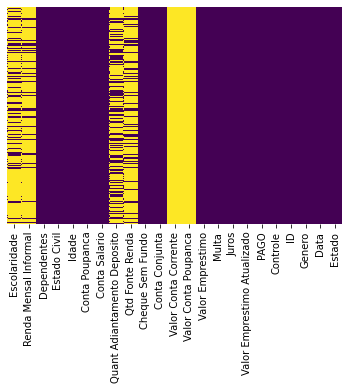

In [8]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis') #fonte: https://github.com/krishnaik06/EDA1/blob/master/EDA.ipynb

In [9]:
df.columns[df.isnull().all()]

Index(['Valor Conta Corrente', 'Valor Conta Poupanca'], dtype='object')

> De cara, percebe-se que há duas colunas que possuem **APENAS** valores nulos (Valor Conta Corrente, Valor Conta Poupanca).  
> Aqui cabe uma **crítica**: como não possuímos nenhum **valor** de renda **formal** declarada, isso pode dificultar na previsão do nosso modelo, visto que, dessa forma, teríamos apenas a coluna de Renda Mensal Informal que pode conter valores ou não (Ex: se o cliente não possuir renda informal ou não declará-la) além desse valor poder variar mensalmente.  
Como estas duas colunas **NÃO** possuem valor algum, podemos dizer, com mais segurança, que elas podem ser removidas.

In [10]:
# remoção das duas colunas nulas
df.drop(columns=['Valor Conta Corrente', 'Valor Conta Poupanca'], inplace=True)

In [11]:
df.head()

,Escolaridade,Renda Mensal Informal,Dependentes,Estado Civil,Idade,Conta Poupanca,Conta Salario,Quant Adiantamento Deposito,Qtd Fonte Renda,Cheque Sem Fundo,...,Valor Emprestimo,Multa,Juros,Valor Emprestimo Atualizado,PAGO,Controle,ID,Genero,Data,Estado
0,NaN,NaN,S,2,36,S,N,NaN,NaN,N,...,8174.32,263.25,5844.98,14282.55,1,1,1328587,1,2020-01-01,57
1,1.0,1894.5078,N,2,39,S,N,2.0,1.0,S,...,41775.63,1607.29,7652.26,51035.18,1,1,1424254,1,2020-01-01,59
2,1.0,NaN,S,2,26,S,N,NaN,1.0,S,...,522940.27,24860.40,319315.62,867116.29,1,1,1438519,0,2020-01-01,56
3,NaN,NaN,N,8,23,N,N,NaN,NaN,N,...,1593.00,21472.36,2967.48,26032.84,1,1,1426138,1,2020-01-01,56
4,NaN,NaN,S,2,33,S,N,NaN,NaN,N,...,2078.97,19.44,46.35,2144.76,1,1,1474504,0,2020-01-01,59


In [12]:
df.columns[df.isnull().any()]

Index(['Escolaridade', 'Renda Mensal Informal', 'Quant Adiantamento Deposito',
       'Qtd Fonte Renda'],
      dtype='object')

> Acima vemos quais colunas do dataframe possem 1 ou mais valores nulos, abaixo faremos uma análise dessas colunas:

In [13]:
missing_values = pd.DataFrame()

missing_values['Nulos'] = df.isnull().sum() # Aqui checamos quantos valores nulos existem em cada coluna do nosso DataFrame

missing_values = missing_values[missing_values['Nulos'] > 0] # Filtramos o dataframe para mostrar apenas as colunas que possuem valores nulos

Text(0.5, 1.0, 'Análise de Valores Nulos nas Colunas do DataFrame')

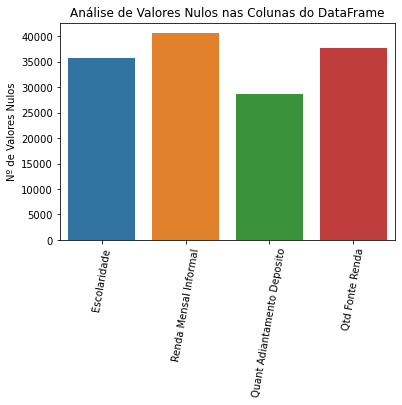

In [14]:
sns.barplot(x=missing_values.index, y=missing_values.Nulos, data=missing_values, order=missing_values.index)
plt.xticks(rotation = 80)
plt.ylabel("Nº de Valores Nulos")
plt.title("Análise de Valores Nulos nas Colunas do DataFrame")

##### Acima vemos que as seguintes colunas do dataset ainda posssuem valores faltantes:

- Escolaridade
- Renda Mensal Informal
- Quant Adiantamento Deposito
- Qtd Fonte Renda


> ##### **Comentário:** A coluna 'Renda Mensal Informal', mesmo possuindo valores nulos, poderia talvez ser utilizada no modelo, já que nem todos os clientes possuem Renda Informal declarada, o que pode explicar seus valores faltantes no dataset.
> ##### Já que esta coluna possui muitos valores faltantes, cerca de 80% de todas as linhas do dataset, vamos adotar o método de preenchimento e, para isso, vamos preencher os valores faltantes com 0 (zero).  
> ##### Obs: Estamos preenchendo com 0 pois, provavelmente, os valores que estão faltando são dos clientes que **NÃO** possuem Renda Informal.

In [15]:
df['Renda Mensal Informal'].fillna(value=0, inplace=True)

In [16]:
df.head()

,Escolaridade,Renda Mensal Informal,Dependentes,Estado Civil,Idade,Conta Poupanca,Conta Salario,Quant Adiantamento Deposito,Qtd Fonte Renda,Cheque Sem Fundo,...,Valor Emprestimo,Multa,Juros,Valor Emprestimo Atualizado,PAGO,Controle,ID,Genero,Data,Estado
0,NaN,0.0000,S,2,36,S,N,NaN,NaN,N,...,8174.32,263.25,5844.98,14282.55,1,1,1328587,1,2020-01-01,57
1,1.0,1894.5078,N,2,39,S,N,2.0,1.0,S,...,41775.63,1607.29,7652.26,51035.18,1,1,1424254,1,2020-01-01,59
2,1.0,0.0000,S,2,26,S,N,NaN,1.0,S,...,522940.27,24860.40,319315.62,867116.29,1,1,1438519,0,2020-01-01,56
3,NaN,0.0000,N,8,23,N,N,NaN,NaN,N,...,1593.00,21472.36,2967.48,26032.84,1,1,1426138,1,2020-01-01,56
4,NaN,0.0000,S,2,33,S,N,NaN,NaN,N,...,2078.97,19.44,46.35,2144.76,1,1,1474504,0,2020-01-01,59


> ##### **Comentário:** como a coluna 'Quant Adiantamento Deposito' também possui muitos valores nulos e remover suas instâncias reduziria nosso dataset pela metade, optamos aqui por preencher seus valores nulos utilizando a **moda**, já que está variável pode nos ajudar a prever o risco de inadimplência de um cliente.  
> Obs: Poderia ser feita a retirada completa dessa variável do nosso conjuntos de dados, porém, como ela pode nos dar uma informação importante na caracterização de um **BOM** ou **MAU** pagador, manteremos esta variável preenchendo seus valores como mencionado acima.

In [17]:
df['Quant Adiantamento Deposito'].isna().sum()

28547

In [18]:
adiantamento_deposito_moda = df['Quant Adiantamento Deposito'].mode(dropna=True)[0]
adiantamento_deposito_moda

2.0

In [19]:
df['Quant Adiantamento Deposito'].fillna(value=adiantamento_deposito_moda, inplace=True)

In [20]:
df['Quant Adiantamento Deposito'].isna().sum()

0

In [21]:
df.head()

,Escolaridade,Renda Mensal Informal,Dependentes,Estado Civil,Idade,Conta Poupanca,Conta Salario,Quant Adiantamento Deposito,Qtd Fonte Renda,Cheque Sem Fundo,...,Valor Emprestimo,Multa,Juros,Valor Emprestimo Atualizado,PAGO,Controle,ID,Genero,Data,Estado
0,NaN,0.0000,S,2,36,S,N,2.0,NaN,N,...,8174.32,263.25,5844.98,14282.55,1,1,1328587,1,2020-01-01,57
1,1.0,1894.5078,N,2,39,S,N,2.0,1.0,S,...,41775.63,1607.29,7652.26,51035.18,1,1,1424254,1,2020-01-01,59
2,1.0,0.0000,S,2,26,S,N,2.0,1.0,S,...,522940.27,24860.40,319315.62,867116.29,1,1,1438519,0,2020-01-01,56
3,NaN,0.0000,N,8,23,N,N,2.0,NaN,N,...,1593.00,21472.36,2967.48,26032.84,1,1,1426138,1,2020-01-01,56
4,NaN,0.0000,S,2,33,S,N,2.0,NaN,N,...,2078.97,19.44,46.35,2144.76,1,1,1474504,0,2020-01-01,59


#### Faremos o mesmo para as colunas 'Escolaridade' e 'Qtd Fonte Renda'.

> ##### Aqui cabe o mesmo comentário da variável anterior, poderíamos retirar essas variáveis, essa seria outra forma de abordar o problema e talvez até mais confiável, mas como temos "poucas" linhas no nosso dataset, optei aqui por preencher estes valores ao invés de retirar essas instâncias ou então remover completamente estas variáveis do nosso dataset.

In [22]:
df['Escolaridade'].isna().sum()

35775

In [23]:
escolaridade_moda = df['Escolaridade'].mode(dropna=True)[0]
escolaridade_moda

1.0

In [24]:
df['Escolaridade'].fillna(value=escolaridade_moda, inplace=True)

In [25]:
df['Escolaridade'].isna().sum()

0

In [26]:
df['Qtd Fonte Renda'].isna().sum()

37584

In [27]:
qtd_fonte_renda_moda = df['Qtd Fonte Renda'].mode(dropna=True)[0]
qtd_fonte_renda_moda

1.0

In [28]:
df['Qtd Fonte Renda'].fillna(value=qtd_fonte_renda_moda, inplace=True)

In [29]:
df['Qtd Fonte Renda'].isna().sum()

0

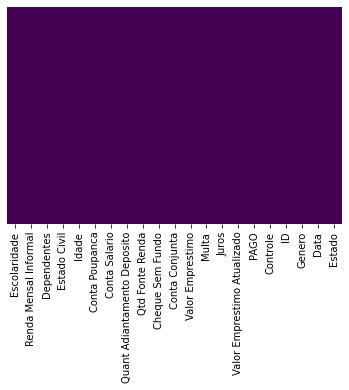

In [30]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis') #fonte: https://github.com/krishnaik06/EDA1/blob/master/EDA.ipynb

##### Em relação às Datas presentes no dataset, vemos abaixo que **TODOS** os nossos dados tiveram sua última atualização no início do ano de 2020

In [31]:
df.Data.unique()

array(['2020-01-01'], dtype=object)

### 2.2 Duplicatas

In [32]:
duplicated_values = df[df.duplicated(subset=['ID'], keep=False)]
duplicated_values.sort_values(by='ID')

,Escolaridade,Renda Mensal Informal,Dependentes,Estado Civil,Idade,Conta Poupanca,Conta Salario,Quant Adiantamento Deposito,Qtd Fonte Renda,Cheque Sem Fundo,...,Valor Emprestimo,Multa,Juros,Valor Emprestimo Atualizado,PAGO,Controle,ID,Genero,Data,Estado
11568,1.0,0.0000,S,2,32,S,N,2.0,1.0,N,...,1923.36,13.21,354.01,2290.58,1,1,1284016,0,2020-01-01,58
32141,1.0,71.4624,N,2,31,S,N,2.0,2.0,N,...,9730.35,975.29,9312.20,20017.84,1,1,1284016,1,2020-01-01,59
37485,1.0,0.0000,S,2,38,S,N,2.0,1.0,S,...,1593.00,3015.06,2882.26,7490.32,1,1,1304080,0,2020-01-01,59
43156,1.0,0.0000,N,4,33,S,N,2.0,1.0,N,...,7053.00,218.40,5469.45,12740.85,0,1,1304080,1,2020-01-01,58
21023,1.0,2.6900,N,2,37,S,N,2.0,1.0,N,...,64605.42,2520.51,63826.29,30790.22,1,1,1304200,1,2020-01-01,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38943,1.0,1250.1980,N,2,30,S,N,2.0,2.0,N,...,1593.00,66834.90,41898.80,10164.70,1,1,21631527280,0,2020-01-01,58
42230,1.0,0.0000,N,8,31,N,N,2.0,1.0,N,...,54131.41,52538.41,100295.82,106803.64,0,1,23997864880,1,2020-01-01,58
42229,1.0,0.0000,N,8,31,N,N,2.0,1.0,N,...,12618.21,11025.21,21047.13,44690.55,0,1,23997864880,1,2020-01-01,58
42234,1.0,0.0000,N,8,31,N,N,2.0,1.0,N,...,29925.33,28332.33,53712.43,11808.09,0,1,23997864892,0,2020-01-01,59


> ##### Comentário: Mesmo tendo valores repetidos na coluna 'ID', temos diversas combinações diferentes quando analisamos estas junto com a coluna 'Estado' (e as demais colunas como: 'Idade', 'Dependentes', 'Qtd Fonte Renda', 'Renda Mensal Informal', etc). Logo, entende-se que 'ID' e 'Estado' possuem uma relação de dependência mútua, trabalhando como chave primária da nossa tabela.

## 3. Análise das Variáveis

### 3.1 Variáveis Numéricas

In [33]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,Escolaridade,Renda Mensal Informal,Estado Civil,Idade,Quant Adiantamento Deposito,Qtd Fonte Renda,Valor Emprestimo,Multa,Juros,Valor Emprestimo Atualizado,PAGO,Controle,ID,Genero,Estado
count,50390.000000,50390.000000,50390.000000,50390.000000,50390.000000,50390.000000,50390.000000,50390.000000,50390.000000,50390.000000,50390.000000,50390.000000,50390.000000,50390.000000,50390.000000
mean,1.050923,898.603785,3.503354,31.724529,2.045485,1.061401,51989.266062,60226.580975,64853.905193,172177.934766,0.790891,1.000000,3740828945.697599,0.498333,57.498055
std,0.285434,11060.986490,2.132091,8.565117,0.593811,0.271344,1588818.991816,2843941.338603,2728170.116998,7058289.875381,0.406676,0.000000,7248461992.172623,0.500002,1.118008
min,1.000000,0.000000,1.000000,18.000000,1.000000,1.000000,1431.000000,0.000000,0.000000,1441.500000,0.000000,1.000000,1168846.000000,0.000000,56.000000
25%,1.000000,0.000000,2.000000,26.000000,2.000000,1.000000,1593.000000,132.567500,274.272500,2840.910000,1.000000,1.000000,1383124.000000,0.000000,56.000000
50%,1.000000,0.000000,2.000000,30.000000,2.000000,1.000000,2298.035000,648.965000,1143.320000,5609.805000,1.000000,1.000000,1439557.000000,0.000000,57.000000
75%,1.000000,0.000000,4.000000,35.000000,2.000000,1.000000,7172.175000,3600.000000,5545.427500,17913.245000,1.000000,1.000000,46996419.250000,1.000000,58.000000
max,3.000000,516960.779100,11.000000,113.000000,18.000000,3.000000,286789375.440000,573775888.890000,570361922.350000,1430927186.680000,1.000000,1.000000,23998870468.000000,1.000000,59.000000


> ##### Comentário: na tabela acima vemos que algumas das colunas numéricas possuem outliers (pontos fora da curva). Vamos tratá-los abaixo

#### 3.1.1 Idade

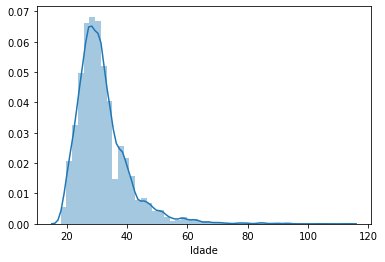

In [34]:
sns.distplot(df['Idade'])

In [35]:
df['Idade'].describe()

count    50390.000000
mean        31.724529
std          8.565117
min         18.000000
25%         26.000000
50%         30.000000
75%         35.000000
max        113.000000
Name: Idade, dtype: float64

#### 3.1.2 Valor Emprestimo

In [36]:
df['Valor Emprestimo'].describe()

count    5.039000e+04
mean     5.198927e+04
std      1.588819e+06
min      1.431000e+03
25%      1.593000e+03
50%      2.298035e+03
75%      7.172175e+03
max      2.867894e+08
Name: Valor Emprestimo, dtype: float64

> ##### Acima, vemos que esta variável possui valores muito discrepantes (outliers), vamos tratá-los abaixo.

In [42]:
Q1_emprestimo = df['Valor Emprestimo'].quantile(0.25)
Q3_emprestimo = df['Valor Emprestimo'].quantile(0.75)
IQR_emprestimo = Q3_emprestimo - Q1_emprestimo

Lower_Whisker_emprestimo = Q1_emprestimo - (1.5 * IQR_emprestimo)
Upper_Whisker_emprestimo = Q3_emprestimo + (1.5 * IQR_emprestimo)
outliers_emprestimo = df[(df['Valor Emprestimo'] > Upper_Whisker_emprestimo) | (df['Valor Emprestimo'] < Lower_Whisker_emprestimo)]['Valor Emprestimo'].count()

print('Primeiro Quartil: ' + str(Q1_emprestimo))
print('Terceiro Quartil: ' + str(Q3_emprestimo))
print('Amplitude: ' + str(IQR_emprestimo))
print('Quantidade de Outliers: ' + str(outliers_emprestimo))

Primeiro Quartil: 1593.0
Terceiro Quartil: 7172.174999999999
Amplitude: 5579.174999999999
Quantidade de Outliers: 7568


##### Vamos eliminar esses valores:

In [43]:
index = df[(df['Valor Emprestimo'] > Upper_Whisker_emprestimo) | (df['Valor Emprestimo'] < Lower_Whisker_emprestimo)].index
df.drop(index, inplace=True)

In [44]:
df.shape

(42822, 21)

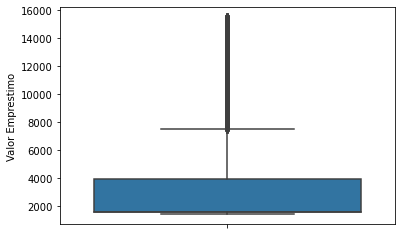

In [47]:
sns.boxplot(y=df['Valor Emprestimo'])

##### 'Multa'

In [137]:
Q1_multa = df['Multa'].quantile(0.25)
Q3_multa = df['Multa'].quantile(0.75)
IQR_multa = Q3_multa - Q1_multa

Lower_Whisker_multa = Q1_multa - (1.5 * IQR_multa)
Upper_Whisker_multa = Q3_multa + (1.5 * IQR_multa)
outliers_multa = df[(df['Multa'] > Upper_Whisker_multa) | (df['Multa'] < Lower_Whisker_multa)]['Multa'].count()

print('Primeiro Quartil: ' + str(Q1_multa))
print('Terceiro Quartil: ' + str(Q3_multa))
print('Amplitude: ' + str(IQR_multa))
print('Quantidade de Outliers: ' + str(outliers_multa))

Primeiro Quartil: 103.52250000000001
Terceiro Quartil: 2059.0
Amplitude: 1955.4775
Quantidade de Outliers: 6226


### 3.2 Variáveis Categóricas

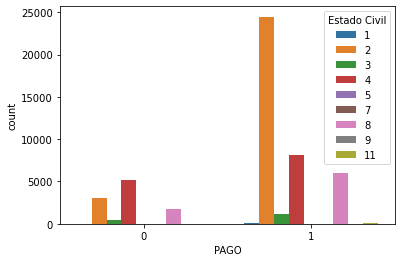

In [10]:
sns.countplot(x='PAGO', hue='Estado Civil', data=df)

### Padronização dos valores booleanos 'S' e 'N' (para que possam ser utilizados no modelo como 0s e 1s)

In [34]:
dict = {
    'S' : 1,
    'N' : 0
}

df_bool = df.replace({'Conta Poupanca' : dict,
            'Conta Salario' : dict, 
            'Cheque Sem Fundo' : dict,
            'Conta Conjunta' : dict})

In [35]:
df_bool.head()

,Escolaridade,Renda Mensal Informal,Dependentes,Estado Civil,Idade,Conta Poupanca,Conta Salario,Quant Adiantamento Deposito,Qtd Fonte Renda,Cheque Sem Fundo,...,Valor Emprestimo,Multa,Juros,Valor Emprestimo Atualizado,PAGO,Controle,ID,Genero,Data,Estado
0,1.0,4635.610641,S,2,36,1,0,2.0,1.0,0,...,8174.32,263.25,5844.98,14282.55,1,1,1328587,1,2020-01-01,57
1,1.0,1894.507800,N,2,39,1,0,2.0,1.0,1,...,41775.63,1607.29,7652.26,51035.18,1,1,1424254,1,2020-01-01,59
2,1.0,4635.610641,S,2,26,1,0,2.0,1.0,1,...,522940.27,24860.40,319315.62,867116.29,1,1,1438519,0,2020-01-01,56
3,1.0,4635.610641,N,8,23,0,0,2.0,1.0,0,...,1593.00,21472.36,2967.48,26032.84,1,1,1426138,1,2020-01-01,56
4,1.0,4635.610641,S,2,33,1,0,2.0,1.0,0,...,2078.97,19.44,46.35,2144.76,1,1,1474504,0,2020-01-01,59


### 4. Relações entre variáveis
#### Para detectar possíveis relações entre as variáveis, vamos plotar a Matriz de Correlação:

In [42]:
# calculate correlation matrix
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2) # fonte https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas/50703596#50703596

,Escolaridade,Renda Mensal Informal,Estado Civil,Idade,Quant Adiantamento Deposito,Qtd Fonte Renda,Valor Emprestimo,Multa,Juros,Valor Emprestimo Atualizado,PAGO,Controle,ID,Genero,Estado
Escolaridade,1.00,0.20,-0.13,0.12,0.09,0.50,0.05,0.02,0.02,0.03,0.00,nan,0.02,0.00,-0.00
Renda Mensal Informal,0.20,1.00,-0.00,0.16,-0.00,0.22,0.13,0.10,0.11,0.11,-0.05,nan,0.06,0.01,-0.01
Estado Civil,-0.13,-0.00,1.00,-0.05,-0.03,-0.16,-0.01,-0.01,-0.01,-0.01,-0.14,nan,0.19,0.00,0.00
Idade,0.12,0.16,-0.05,1.00,0.11,0.14,0.06,0.05,0.06,0.05,-0.02,nan,0.08,-0.00,-0.01
Quant Adiantamento Deposito,0.09,-0.00,-0.03,0.11,1.00,0.11,0.00,-0.00,0.00,0.00,0.03,nan,-0.00,-0.00,-0.01
Qtd Fonte Renda,0.50,0.22,-0.16,0.14,0.11,1.00,0.05,0.03,0.04,0.04,0.02,nan,0.02,0.01,-0.01
Valor Emprestimo,0.05,0.13,-0.01,0.06,0.00,0.05,1.00,0.94,0.93,0.96,-0.05,nan,0.04,-0.01,-0.00
Multa,0.02,0.10,-0.01,0.05,-0.00,0.03,0.94,1.00,0.98,0.99,-0.04,nan,0.04,-0.00,-0.00
Juros,0.02,0.11,-0.01,0.06,0.00,0.04,0.93,0.98,1.00,0.99,-0.04,nan,0.04,-0.00,-0.00
Valor Emprestimo Atualizado,0.03,0.11,-0.01,0.05,0.00,0.04,0.96,0.99,0.99,1.00,-0.04,nan,0.04,-0.00,-0.00


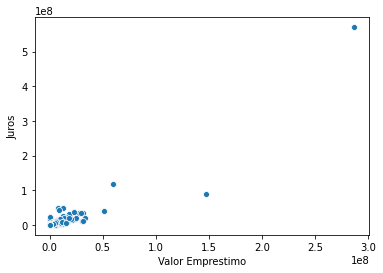

In [44]:
sns.scatterplot(x='Valor Emprestimo', y='Juros', data=df)